# Data Challenge

## Advanced Learning Model

## Libraries

In [394]:
#!pip3 install <pkg>

In [63]:
# Used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from collections import Counter
import collections
from itertools import combinations_with_replacement
import cvxopt
cvxopt.solvers.options['show_progress'] = False

## Functions

In [178]:
def get_kmers(seq, k):
    '''
    Get k-mers subsequences of a sequence
    '''
    return [seq[i:i+k] for i in range(len(seq) - k + 1)]

def kmers_counting(seq, k):
    '''
    Get the counting of all possible kmers of a sequence
    '''
    # Creation of the vocabulary for the kmers counting
    x = ''
    for i in range(k):
        x = x + 'actg'
    voc = set([''.join(l) for l in combinations_with_replacement(x,k)])
    
    dic = {}
    for kmer in voc:
        dic[kmer] = 0
    dic.update(Counter(get_kmers(seq, k)))
    return list(collections.OrderedDict(sorted(dic.items())).values())

def kmers_counting_mismatch(seq, k):
    '''
    Get the counting of all possible kmers of a sequence with a possible error
    '''
    # Creation of the vocabulary for the kmers counting
    x = ''
    for i in range(k):
        x = x + 'actg'
    voc = set([''.join(l) for l in combinations_with_replacement(x,k)])

    dic = {}
    for kmer in voc:
        dic[kmer] = 0
    for kmer in get_kmers(seq, k):
        dic[kmer] = 1
        for i in range(len(kmer)):
            for aa in 'actg':
                rep_kmer = kmer[0:i] + aa + kmer[i+1:len(kmer)]
                dic[rep_kmer] = 1
    return list(collections.OrderedDict(sorted(dic.items())).values())
            
def hash_fun(word):
    '''
    Get a numerical vector for a DNA sequence
    '''
    output = np.array([])
    dic = {'a': [1,0,0,0], 'c': [0,1,0,0], 'g': [0,0,1,0], 't': [0,0,0,1]}
    for i in range(len(word)):
        output = np.append(output, dic[word[i]])
    return list(output.astype(int))

def hash_fun_on_list(words):
    '''
    Get a list of numerical vector for a list of DNA sequence
    '''
    output = []
    for i in range(len(words)):
        output.append(hash_fun(words[i]))
    return list(output)

def classifier_0tom1(y):
    '''
    Get {-1,1} for {0,1}, for classfier such has perceptron 
    '''
    if (y == 0):
        return int(-1)
    else:
        return 1

def classifier_m1to0(y):
    '''
    Get {0,1} for {-1,1}, for classfier such has perceptron 
    '''
    if (y == -1):
        return int(0)
    else:
        return 1

# Classfiers

## Perceptron

MLF Class

In [189]:
class perceptron():

    def __init__(self):
        self.w_0 = []
        self.w = []
        self.T = 1000
        self.eta = 1

    def fit(self, train_features, train_labels):
        w_0 = 0
        w = np.zeros(len(train_features[0]))
        t = 0
        while t < self.T:
            i = random.randrange(len(w))
            if train_labels[i] * np.dot(w, train_features[i]) <= 0:
                w_0 = w_0 + self.eta * train_labels[i]
                w = w + self.eta * train_labels[i] * np.array(train_features[i])
            t = t+1
        self.w_0 = w_0
        self.w = w
        
    def predict(self, test_features):
        if len(self.w) > 0:
            predict_labels = []
            for i in range(len(test_features)):
                if np.dot(self.w, test_features[i]) <= 0:
                    predict_labels.append(int(-1))
                else:
                    predict_labels.append(int(1))
            return predict_labels

## Adaline

MLF Class

In [193]:
class adaline():

    def __init__(self):
        self.w_0 = []
        self.w = []
        self.T = 1000
        self.eta = 1

    def fit(self, train_features, train_labels):
        w_0 = 0
        w = np.zeros(len(train_features[0]))
        t = 0
        while t < self.T:
            i = random.randrange(len(w))
            if train_labels[i] * np.dot(w, train_features[i]) <= 0:
                w_0 = w_0 + self.eta * (train_labels[i] - np.dot(w, train_features[i]) + w_0)
                w = w + self.eta * (train_labels[i] - np.dot(w, train_features[i]) + w_0) * np.array(train_features[i])
            t = t+1
        self.w_0 = w_0
        self.w = w
        
    def predict(self, test_features):
        if len(self.w) > 0:
            predict_labels = []
            for i in range(len(test_features)):
                if np.dot(self.w, test_features[i]) <= 0:
                    predict_labels.append(int(-1))
                else:
                    predict_labels.append(int(1))
            return predict_labels

## Pegasos

MLF Class

In [5]:
class pegasos():

    def __init__(self):
        self.w = []
        self.T = 1000
        self.lmbda = 1

    def fit(self, train_features, train_labels):
        m = len(train_features)
        w = np.zeros(len(train_features[0]))
        t = 1
        while t < self.T:
            train_features_plus = []
            train_labels_plus = []
            for i in range(len(train_features)):
                if train_labels[i] * np.dot(w, train_features[i]) < 1:
                    train_features_plus.append(train_features[i])
                    train_labels_plus.append(train_labels[i])
            eta_t = 1 / (self.lmbda * t)
            #np.array(train_labels_plus) * np.array(train_features_plus)
            w = (1 - self.lmbda * eta_t) * w + eta_t / m * np.sum(np.dot(train_labels_plus,train_features_plus))
            t = t+1
        self.w = w
        
    def predict(self, test_features):
        if len(self.w) > 0:
            predict_labels = []
            for i in range(len(test_features)):
                if np.dot(self.w, test_features[i]) <= 0:
                    predict_labels.append(int(-1))
                else:
                    predict_labels.append(int(1))
            return predict_labels

## Multinomial Naive Bayes

https://medium.com/@johnm.kovachi/implementing-a-multinomial-naive-bayes-classifier-from-scratch-with-python-e70de6a3b92e

In [69]:
class mnnaivebayes():

    def __init__(self):
        self.logprior = {}
        self.loglikelihood = {}
        self.V = {}
        self.C = {}

    def fit(self, D, C):
        set_C = set(C)
        logprior = {}
        loglikelihood = {}
        bigdoc = {}
        from collections import Counter
        N_doc = len(D)
        if len(self.V) > 0:
            V = self.V
        else:
            V = set(np.concatenate(D))
        for c in set_C:
            N_c = Counter(C)[c]
            logprior[c] = np.log(N_c/N_doc)
            bigdoc[c] = np.concatenate([D[i] for i in range(len(D)) if C[i] == c])
            count_c = Counter(bigdoc[c])
            count_c_sum = np.sum(list(count_c.values()))
            for w in V:
                loglikelihood[(w,c)] = np.log((count_c[w] + 1)/(count_c_sum + len(V)))
        self.logprior = logprior
        self.loglikelihood = loglikelihood
        self.V = V
        self.C = set_C
        
    def predict(self, doc):
        if len(self.logprior) > 1 and len(self.loglikelihood) > 1 and len(self.V) > 1 and len(self.C) > 1:
            pred_c = []
            for d in doc:
                pmax = -np.inf
                for c in self.C:
                    p = self.logprior[c] + np.sum([self.loglikelihood[(wi, c)] for wi in d if wi in self.V])
                    if p > pmax:
                        pmax = p
                        cmax = c
                pred_c.append(cmax)
            return pred_c
        else:
            print('No training!')

## SVM

https://www.mit.edu/~9.520/spring10/Classes/class05-svm.pdf

In [180]:
class svm():

    def __init__(self, kernel='linear', gamma='scale', lam=1e-2, k=3, normalized_kernel=False, thresh=1e-5):
        self.kernel = kernel
        self.gamma = gamma
        self.k = k
        self.gamma_val = []
        self.lam = lam
        self.sv_alpha = []
        self.sv = []
        self.sv_y = []
        self.b = []
        self.normalized_kernel = normalized_kernel
        self.thresh = thresh
    
    def get_kmers(self, seq, k):
        '''
        Get k-mers subsequences of a sequence
        '''
        return [seq[i:i+k] for i in range(len(seq) - k + 1)]

    def spectrum_kernel(self, x_i, x_j, k):
        '''
        Get the counting of all possible kmers of a sequence
        '''
        x = ''
        for i in range(k):
            x = x + 'actg'
        voc = set([''.join(l) for l in combinations_with_replacement(x,k)])
        
        dic_i = {}
        dic_j = {}
        for kmer in voc:
            dic_i[kmer] = 0
            dic_j[kmer] = 0
        dic_i.update(Counter(self.get_kmers(x_i, k)))
        dic_j.update(Counter(self.get_kmers(x_j, k)))
        k_i = list(collections.OrderedDict(sorted(dic_i.items())).values())
        k_j = list(collections.OrderedDict(sorted(dic_j.items())).values())
        return np.dot(k_i, k_j)
        
    def fit(self, X, y):
        X = np.array(X)
        m = np.shape(X)[0]
        y = np.array(y)
        
        # Computing kernel
        K = np.zeros((m, m))
        lam = self.lam
        gamma_val = 1/m
        if self.kernel == 'gaussian':
            if self.gamma == 'auto':
                gamma_val = 1/m
            else:
                gamma_val = 1/(X.var()*m)
            for i in range(m):
                for j in range(m):
                    K[i,j] = np.exp(-gamma_val*np.linalg.norm([X[i], X[j]], ord=2))
        if self.kernel == 'spectrum_kernel':
            for i in range(m):
                for j in range(m):
                    K[i,j] = self.spectrum_kernel(X[i], X[j], self.k)
        else:
            for i in range(m):
                for j in range(m):
                    K[i,j] = np.dot(X[i], X[j])
        
        if self.normalized_kernel:
            K_ = np.copy(K)
            for i in range(K.shape[0]):
                for j in range(K.shape[1]):
                    K[i,j] /= np.sqrt(K_[i,i]*K_[j,j])
        
        # Finding the optimal solution
        P = cvxopt.matrix(np.outer(y, y) * K/(2*lam))
        q = cvxopt.matrix(np.ones(m) * -1)
        G = cvxopt.matrix(np.vstack((np.diag(np.ones(m) * -1), np.identity(m))))
        h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m)/m)))

        A = cvxopt.matrix(y.astype('d'), (1,m))
        b = cvxopt.matrix(0.0)
        
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        alpha = np.ravel(sol['x'])
        
        # Selecting the support vectors
        S = np.arange(m)[alpha > self.thresh]
        sv_alpha, sv, sv_y = alpha[S], X[S], y[S]
        
        print(str(len(S)) + ' support vector(s) on ' + str(m))
        
        N = len(sv_alpha)
        f = np.zeros((N))

        for i in range(N):
            f[i] = 1/(2*lam)*np.sum(sv_alpha * sv_y * K[S[i],S])
        
        b = np.mean(sv_y - f)
        
        self.sv_alpha = sv_alpha
        self.sv = sv
        self.sv_y = sv_y
        self.b = b
        self.gamma_val = gamma_val
        
        
    def predict(self, X):
        np.array(X)
        lam = self.lam
        sv_alpha = self.sv_alpha
        sv = self.sv
        sv_y = self.sv_y
        b = self.b
        
        pred = np.zeros(len(X))
        m = len(X)
        
        K = np.zeros((m, len(sv)))
        
        if self.kernel == 'gaussian':
            gamma_val = self.gamma_val
            for i in range(m):
                for j in range(len(sv)):
                    K[i,j] = np.exp(-gamma_val*np.linalg.norm([X[i], sv[j]], ord=2))
        if self.kernel == 'spectrum_kernel':
            for i in range(m):
                for j in range(len(sv)):
                    K[i,j] = self.spectrum_kernel(X[i], sv[j])
        else:
            for i in range(m):
                for j in range(len(sv)):
                    K[i,j] = np.dot(X[i], sv[j])
        
        if self.normalized_kernel:
            for i in range(K.shape[0]):
                K[i,:] /= np.linalg.norm(X[i])
            for j in range(K.shape[1]):
                K[:, j] /= np.linalg.norm(sv[j])
                    
        for i in range(len(pred)):
            pred[i] = 1/(2*lam)*np.sum(sv_alpha * sv_y * K[i,:])
            
        return np.sign(pred + b)

## Ytek file creation

In [ ]:
k = 4

# Train and test file by file
X_tr = pd.DataFrame()
Y_tr = pd.DataFrame()
    
for i in [0, 1, 2]:
    if i == 0:
        k = 4
        l = 2
        thresh = 1e-5
    if i == 1:
        k = 4
        l = 2
        thresh = 1e-5
    if i == 2:
        k = 4
        l = 2
        thresh = 1e-5
    
    ## Training
    X_tr = pd.read_table('data/Xtr' + str(i) + '.csv', ',').drop('Id', axis = 1)
    Y_tr = pd.read_table('data/Ytr' + str(i) + '.csv', ',').drop('Id', axis = 1)
    
    # All sequences in lower case
    X_tr['seq'] = X_tr.apply(lambda x: x['seq'].lower(), axis = 1)
    
    # K-mers splitting
    #X_tr['features'] = X_tr.apply(lambda x: get_kmers(x['seq'], k), axis = 1)
    # Features translation
    #X_tr['features'] = X_tr.apply(lambda x: hash_fun(x['seq']), axis = 1)
    # K-mers counting
    X_tr['features'] = X_tr.apply(lambda x: kmers_counting(x['seq'], k), axis = 1)
    # K-mers mismatch counting
    #X_tr['features'] = X_tr.apply(lambda x: kmers_counting_mismatch(x['seq'], k), axis = 1)
    
    # Class {0,1} to {-1,1} to use SVM
    Y_tr['Class'] = Y_tr.apply(lambda x: classifier_0tom1(x['Bound']), axis = 1)
    
    
    ## Testing
    # Concatenate all testing datasets
    X_te = pd.DataFrame()
    X_te = pd.read_table('data/Xte' + str(i) + '.csv', ',').drop('Id', axis = 1)

    # All sequences in lower case
    X_te['seq'] = X_te.apply(lambda x: x['seq'].lower(), axis = 1)

    # K-mers splitting
    #X_te['features'] = X_te.apply(lambda x: get_kmers(x['seq'], k), axis = 1)
    # Features translation
    #X_te['features'] = X_te.apply(lambda x: hash_fun(x['seq']), axis = 1)
    # K-mers counting
    X_te['features'] = X_te.apply(lambda x: kmers_counting(x['seq'], k), axis = 1)
    # K-mers mismatch counting
    #X_te['features'] = X_te.apply(lambda x: kmers_counting_mismatch(x['seq'], k), axis = 1)

    # Classifier
    clf = svm(lam=1/(l*len(X_tr)), kernel='linear', normalized_kernel=False, thresh=thresh)
    # Training
    clf.fit(list(X_tr['features']), list(Y_tr['Class']))
    # Testing
    y = clf.predict(X_te['features'])
    y = [classifier_m1to0(y_i) for y_i in y]
    Y_te = pd.DataFrame(y, columns=['Bound'])
    Y_te.index.name = 'Id'
    # Y_te file creation
    Y_te.to_csv('Yte' + str(i) + '.csv')

# Concatenate all testing datasets
Y_te = pd.DataFrame()
for i in [0, 1, 2]:
    Y_te = Y_te.append(pd.read_table('Yte' + str(i) + '.csv', ',').drop('Id', axis = 1), ignore_index = True)

# Y_te file creation
Y_te.index.name = 'Id'
Y_te.to_csv('Yte.csv')

## K-fold cross validation on training set

In [ ]:
acc = {}

for k in range(1,15):
    for l in [2]:
        # Train and test file by file
        X_tr = pd.DataFrame()
        Y_tr = pd.DataFrame()
        acc_k = []
        for i in [0, 1, 2]:
            ## Training
            X_tr = pd.read_table('data/Xtr' + str(i) + '.csv', ',').drop('Id', axis = 1)
            Y_tr = pd.read_table('data/Ytr' + str(i) + '.csv', ',').drop('Id', axis = 1)

            print('Preprocessing...')
            # All sequences in lower case
            X_tr['seq'] = X_tr.apply(lambda x: x['seq'].lower(), axis = 1)

            # K-mers splitting
            #X_tr['features'] = X_tr.apply(lambda x: get_kmers(x['seq'], k), axis = 1)
            # Features translation
            #X_tr['features'] = X_tr.apply(lambda x: hash_fun(x['seq']), axis = 1)
            # K-mers counting
            X_tr['features'] = X_tr.apply(lambda x: kmers_counting(x['seq'], k), axis = 1)
            # K-mers mismatch counting
            #X_tr['features'] = X_tr.apply(lambda x: kmers_counting_mismatch(x['seq'], k), axis = 1)
            
            # Class {0,1} to {-1,1} to use SVM
            Y_tr['Class'] = Y_tr.apply(lambda x: classifier_0tom1(x['Bound']), axis = 1)
            print('Preprocessing done')
            
            ## Testing
            kf = KFold(n_splits = 5)
            iteration = -1
            for train_index, test_index in kf.split(list(X_tr['features'])):
                iteration += 1
                feature_train, feature_test = np.array(list(X_tr['features']))[train_index], np.array(list(X_tr['features']))[test_index]
                label_train, label_test = np.array(list(Y_tr['Class']))[train_index], np.array(list(Y_tr['Class']))[test_index]
                clf = adaline()
                #clf = mnnaivebayes()
                #clf = SVC(kernel='linear', C=1)
                #clf = mnnaivebayes()
                #clf = svm(lam=1/(l*len(feature_train)))
                clf.fit(feature_train, label_train)
                acc[('file' + str(i), k, l, iteration)] = (Counter(clf.predict(feature_test) == np.array(label_test))[True]/len(feature_test))
                print('file' + str(i) + ', ' + str(k) + ', ' + str(l) + ', ' + str(iteration) + ': ' + str(acc[('file' + str(i), k, l, iteration)]))
print('')
print('END')
print('--------------')

## [Multinomial Naïve Bayes] Finding best k

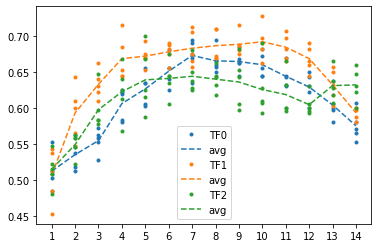

In [187]:
accuracy_keys = []
accuracy_values = []
accuracy_means = []
for f in [0, 1, 2]:
    keys = [list(acc.keys())[i][1] for i in range(len(acc.keys())) if list(acc.keys())[i][0] == 'file'+str(f)]
    values = [list(acc.values())[i] for i in range(len(acc.values())) if list(acc.keys())[i][0] == 'file'+str(f)]
    means = [np.mean(values[i:i+5]) for i in range(0,len(values),5)]
    plt.plot(keys, values, '.', color='C'+str(f))
    plt.plot(list(set(keys)), means, '--', color='C'+str(f))
    
plt.legend(['TF0', 'avg', 'TF1', 'avg', 'TF2', 'avg'])
plt.xticks(list(set(keys)))
plt.savefig('img/acc_mnb.pdf')
plt.show()

## [Spectrum SVM] Finding best k

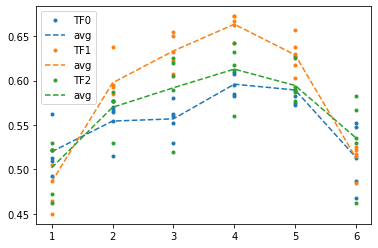

In [185]:
accuracy_keys = []
accuracy_values = []
accuracy_means = []
for f in [0, 1, 2]:
    keys = [list(acc.keys())[i][1] for i in range(len(acc.keys())) if list(acc.keys())[i][0] == 'file'+str(f) and list(acc.keys())[i][1] < 7]
    values = [list(acc.values())[i] for i in range(len(acc.values())) if list(acc.keys())[i][0] == 'file'+str(f) and list(acc.keys())[i][1] < 7]
    means = [np.mean(values[i:i+5]) for i in range(0,len(values),5)]
    plt.plot(keys, values, '.', color='C'+str(f))
    plt.plot(list(set(keys)), means, '--', color='C'+str(f))
    
plt.legend(['TF0', 'avg', 'TF1', 'avg', 'TF2', 'avg'])
plt.xticks(list(set(keys)))
plt.savefig('img/acc_spectrumsvm.pdf')
plt.show()